In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scikit-learn



# Import lib and load data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("car_price_dataset.csv")

In [4]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


✲ There are 10000 rows and there are 6 columns.

* Brand: The manufacturer of the car (e.g., Kia, Chevrolet, BMW).
* Model: The specific model of the car (e.g., Rio, Malibu, Q5).
* Year: The manufacturing year of the car.
* Engine_Size: The engine capacity in liters (L).
* Fuel_Type: The type of fuel the car uses (e.g., Diesel, Hybrid, Electric, Petrol).
* Transmission: The type of transmission system (e.g., Manual, Automatic, Semi-Automatic).
* Mileage: The total distance the car has traveled in kilometers.
* Doors: The number of doors in the car.
* Owner_Count: The number of previous owners the car has had.
* Price: The selling price of the car in the given currency.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2011.54370,6.897699,2000.0,2006.00,2012.0,2017.0,2023.0
Engine_Size,10000.0,3.00056,1.149324,1.0,2.00,3.0,4.0,5.0
Mileage,10000.0,149239.11180,86322.348957,25.0,74649.25,149587.0,223577.5,299947.0
Doors,10000.0,3.49710,1.110097,2.0,3.00,3.0,4.0,5.0
Owner_Count,10000.0,2.99110,1.422682,1.0,2.00,3.0,4.0,5.0
Price,10000.0,8852.96440,3112.596810,2000.0,6646.00,8858.5,11086.5,18301.0


In [7]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [10]:
df_corr = df.select_dtypes(include=["float","int"]).corr()

df_corr

#df.corr(numeric_only=True) # this is other way

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
Year,1.000000,-0.001306,-0.002476,0.014867,0.000116,0.663036
Engine_Size,-0.001306,1.000000,0.015135,-0.009844,0.007122,0.357403
Mileage,-0.002476,0.015135,1.000000,0.007879,0.006287,-0.551227
Doors,0.014867,-0.009844,0.007879,1.000000,-0.005431,0.000511
Owner_Count,0.000116,0.007122,0.006287,-0.005431,1.000000,0.002656
Price,0.663036,0.357403,-0.551227,0.000511,0.002656,1.000000


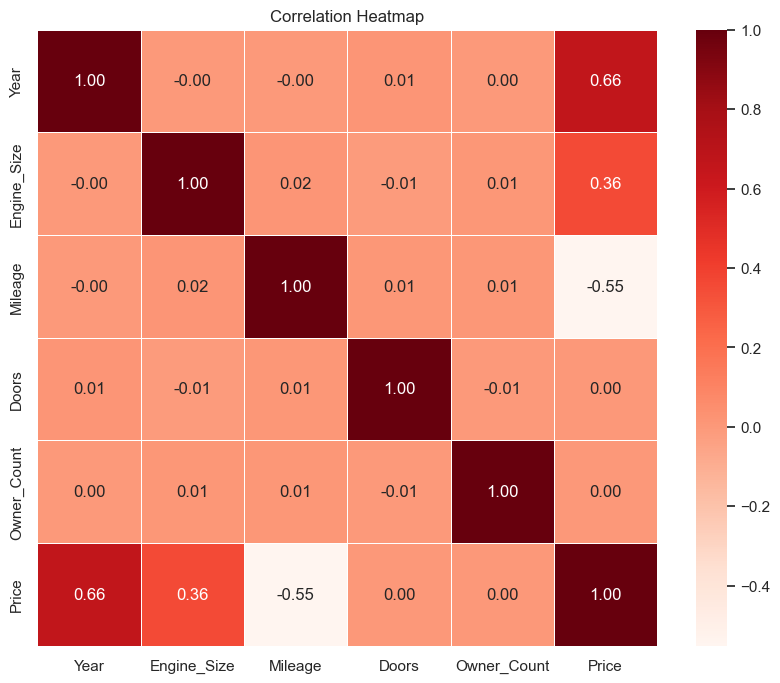

In [42]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(numeric_only=True),annot=True, cmap = "Reds", fmt=".2f", linewidths= 0.7)

plt.title("Correlation Heatmap")
plt.show()

In [12]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [13]:
for column in df.columns:
    unique_values = df[column].nunique()
    unique_count = df[column].unique()
    print(f"{column} : { unique_count } unique value --> {unique_values}")
    print("\n")

Brand : ['Kia' 'Chevrolet' 'Mercedes' 'Audi' 'Volkswagen' 'Toyota' 'Honda' 'BMW'
 'Hyundai' 'Ford'] unique value --> 10


Model : ['Rio' 'Malibu' 'GLA' 'Q5' 'Golf' 'Camry' 'Civic' 'Sportage' 'RAV4'
 '5 Series' 'CR-V' 'Elantra' 'Tiguan' 'Equinox' 'Explorer' 'A3' '3 Series'
 'Tucson' 'Passat' 'Impala' 'Corolla' 'Optima' 'Fiesta' 'A4' 'Focus'
 'E-Class' 'Sonata' 'C-Class' 'X5' 'Accord'] unique value --> 30


Year : [2020 2012 2023 2003 2007 2010 2001 2014 2005 2013 2009 2004 2017 2006
 2000 2021 2018 2016 2011 2022 2008 2015 2002 2019] unique value --> 24


Engine_Size : [4.2 2.  2.6 2.7 3.4 4.7 3.1 1.3 4.5 4.8 2.3 2.4 3.2 2.9 1.5 1.8 4.6 2.8
 3.9 3.3 1.9 3.5 1.4 2.2 1.  1.2 4.9 3.6 3.8 4.  1.7 1.6 4.1 1.1 2.5 3.
 5.  2.1 3.7 4.3 4.4] unique value --> 41


Fuel_Type : ['Diesel' 'Hybrid' 'Electric' 'Petrol'] unique value --> 4


Transmission : ['Manual' 'Automatic' 'Semi-Automatic'] unique value --> 3


Mileage : [289944   5356 231440 ...  86664 225772 157882] unique value --> 9854


Doors

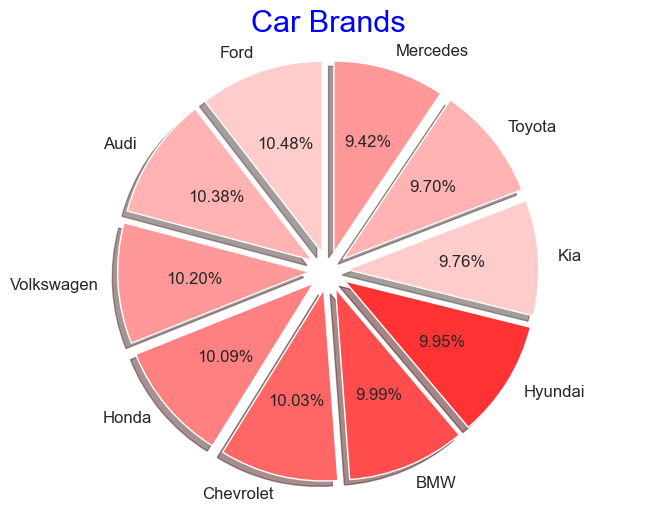

In [41]:
new_list = df.Brand.value_counts()
labels = df.Brand.value_counts().index

colors = ["#FFCCCC", "#FFB3B3", "#FF9999", "#FF8080", "#FF6666", "#FF4D4D", "#FF3333"]


fig , ax = plt.subplots(figsize=(8,6))
ax.pie(new_list,labels=labels,autopct="%1.2f%%",startangle=90,explode=[0.1]*len(labels),shadow = True,textprops = {"fontsize": 12},colors=colors)

ax.set_title("Car Brands",fontsize = 22,color="blue")
ax.axis("equal")

plt.show()

* The distribution is fairly balanced, with Ford holding the largest share at 10.48%, followed closely by Audi, Volkswagen, and Honda. Mercedes has the smallest share among the brands listed.

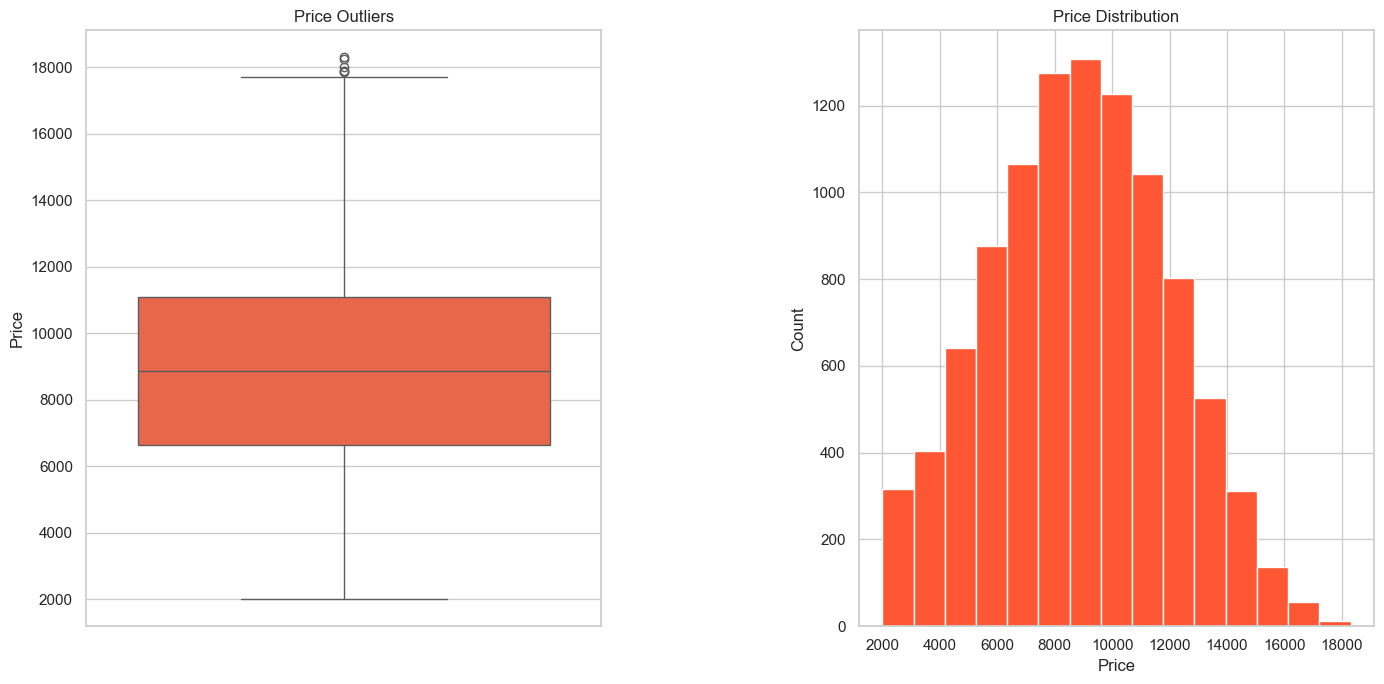

In [39]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.boxplot(y=df["Price"],ax=axes[0],color = "#FF5733")
axes[0].set_title("Price Outliers")

df["Price"].hist(bins=15, color = "#FF5733",ax=axes[1])

axes[1].set_xlabel("Price")
axes[1].set_ylabel("Count")
axes[1].set_title("Price Distribution")

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

* The histogram displays a right-skewed distribution, indicating that the majority of cars are priced lower, with higher-priced cars being less frequent.


In [16]:
pivot = df.pivot_table(
    index = "Brand",
    values="Price",
    aggfunc="mean"
)

pivot

,Price
Brand,
Audi,8929.373796
BMW,8704.068068
Chevrolet,9015.683948
Ford,8852.570611
Honda,8665.596630
Hyundai,8778.279397
Kia,8880.086066
Mercedes,8980.087049
Toyota,8798.184536


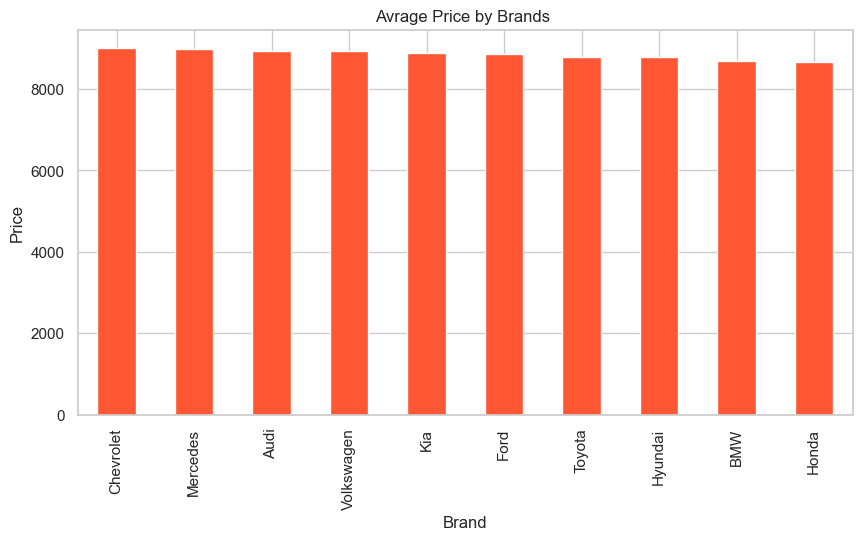

In [37]:
df.groupby("Brand")["Price"].mean().sort_values(ascending=False).plot(kind="bar",figsize=(10,5),color = "#FF5733",)

plt.title("Avrage Price by Brands ")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()

* The average prices across brands seem fairly consistent, reflecting a balanced market value for these car brands. There aren't any major price differences, implying that factors such as model year, mileage, and features likely play a more significant role in pricing than the brand alone.

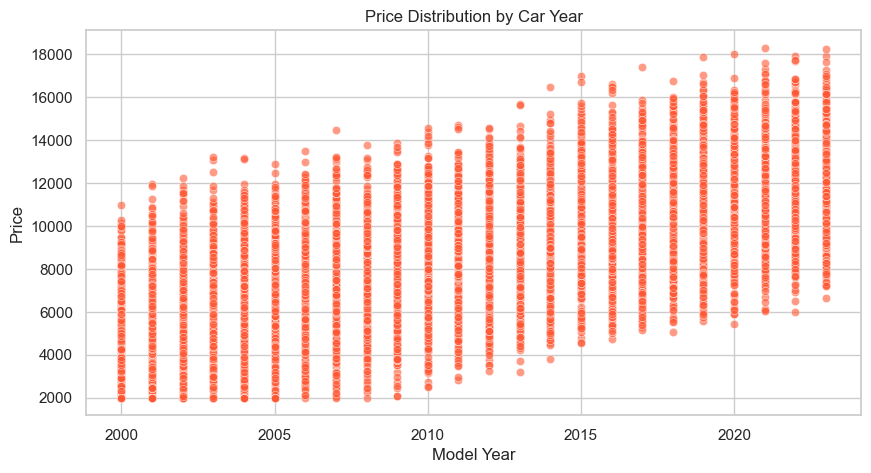

In [36]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
sns.scatterplot(data = df , x="Year",y = "Price", color = "#FF5733",alpha=0.6)

plt.title("Price Distribution by Car Year")
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.show()

* A distinct upward trend is evident, suggesting that newer cars are typically priced higher. While older models usually have lower prices, some exceptions indicate that certain older cars maintain considerable value, likely due to factors like brand, condition, or distinctive features.

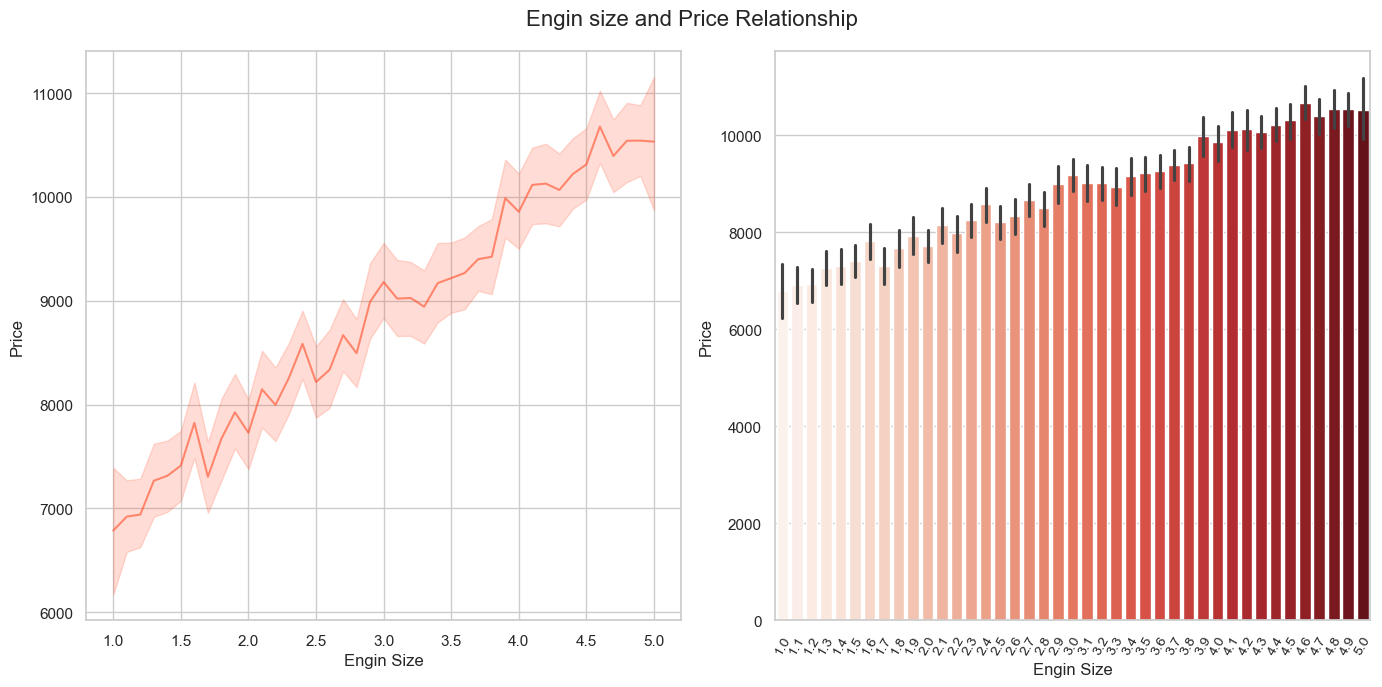

In [35]:
plt.figure(figsize=(14,7))

plt.suptitle("Engin size and Price Relationship", fontsize = 16)

plt.subplot(1,2,1)
sns.lineplot(data = df , x = "Engine_Size", y = "Price", color = "#FF5733", alpha = 0.65)
plt.xlabel("Engin Size")
plt.ylabel("Price")

plt.subplot(1,2,2)
sns.barplot(data = df , x = "Engine_Size", y = "Price", palette="Reds")
plt.xlabel("Engin Size")
plt.ylabel("Price")
plt.xticks(rotation=60, fontsize=10)

plt.tight_layout()
plt.show()

* A positive relationship exists between engine size and price, indicating that vehicles with larger engines are generally more costly. The trend remains consistent, demonstrating that as engine capacity rises, the price increases as well, likely due to enhanced performance and premium features.

In [27]:
fule = df["Fuel_Type"].value_counts()

fig = go.Figure()
fig.add_trace(go.Pie(
    values=fule.values,
    labels=fule.index,
    domain={"x": [0,.5]},
    hoverinfo="label+percent+value",
    marker = dict(colors= ["#FF0000", "#FF4D4D", "#FF8080", "#FFB3B3"])
))

fig.update_layout(
    title_text = "Vehicle Distribution by Fuel Type",
    annotations = [{
        "font": {"size": 20},
        "showarrow": False,
        "text": " ",  
        "x": 0.20,
        "y": 1
    }],
    legend=dict(
        x=0.6,
        y=0.5,
        font=dict(size=12)
    ),
    margin=dict(l=10,r=10,t=50,b=50)

)

iplot(fig)

* Electric cars have the highest average price, followed by Hybrid vehicles, while Petrol and Diesel cars are priced similarly at a lower range. This suggests that electric and hybrid cars are generally more expensive, possibly due to newer technology and higher production costs.

In [21]:
df.Doors.value_counts()

Doors
3    2575
4    2514
5    2456
2    2455
Name: count, dtype: int64

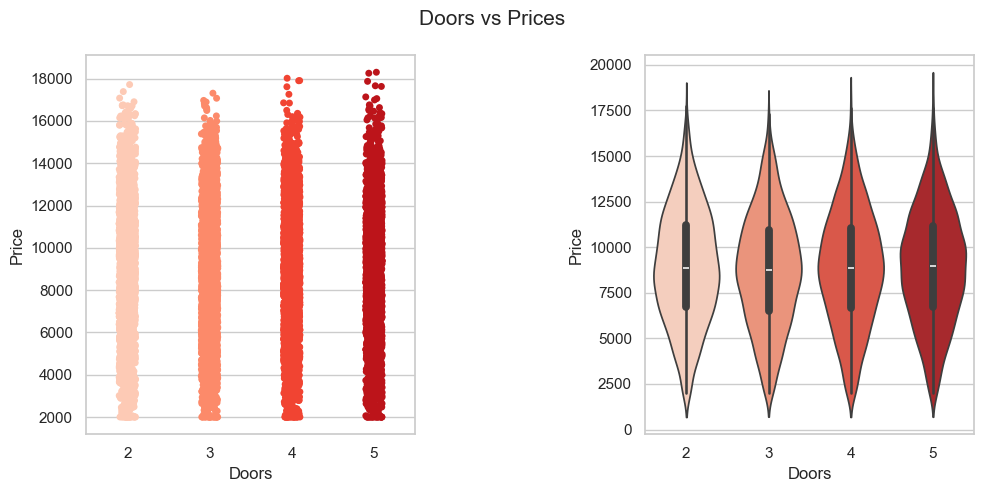

In [26]:
plt.figure(figsize=(10,5))

plt.suptitle("Doors vs Prices", fontsize=15)

plt.subplot(1,2,1)
sns.stripplot(x=df.Doors, y = df.Price, palette="Reds")
plt.xlabel("Doors")
plt.ylabel("Price")

plt.subplot(1,2,2)
sns.violinplot(x=df.Doors, y = df.Price, palette="Reds")
plt.xlabel("Doors")
plt.ylabel("Price")

plt.tight_layout()
plt.subplots_adjust(wspace=0.7)
plt.show()

*  Cars with 2 to 5 doors exhibit a similar price range, but 5-door cars have a slightly higher median price and a wider distribution, suggesting a greater variety in pricing. There is no strong trend indicating that door count significantly impacts car prices.

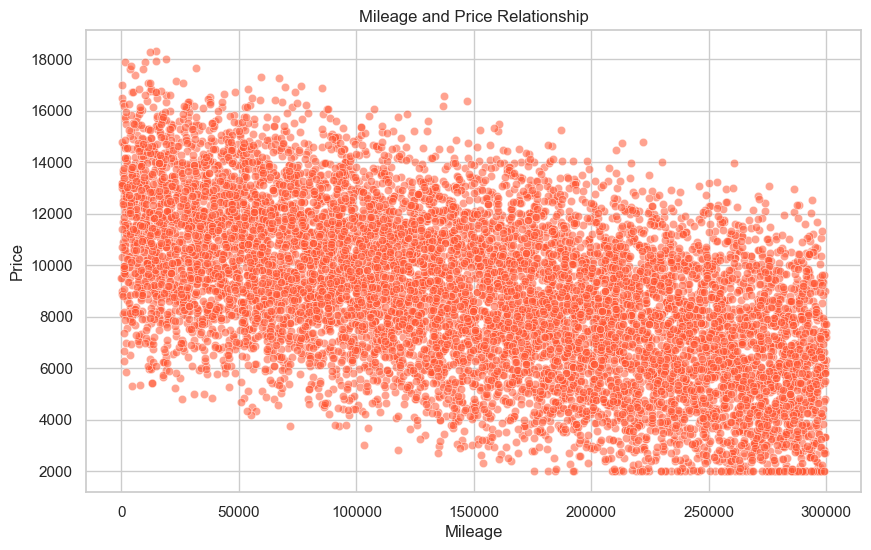

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df , x = "Mileage", y = "Price", color = "#FF5733", alpha = 0.55)

plt.title("Mileage and Price Relationship")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

* A strong negative relationship exists between mileage and price, meaning that as the mileage increases, the price of the car generally decreases. This indicates that vehicles with higher mileage are usually less expensive, possibly because the wear and tear lowers their value in the market.

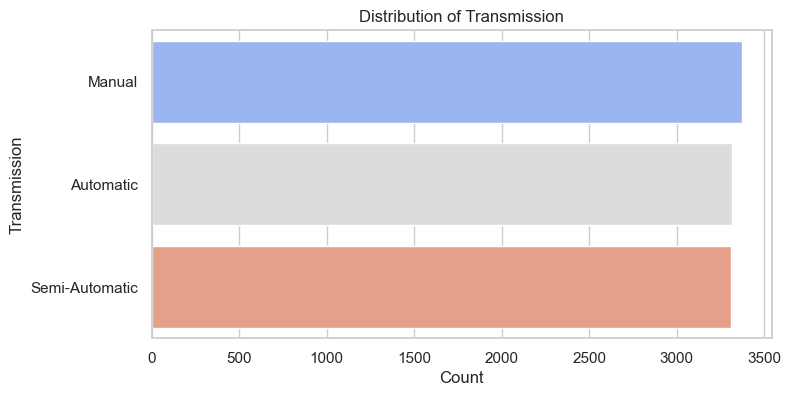

In [45]:
plt.figure(figsize=(8,4))

sns.countplot(y=df.Transmission,palette="coolwarm")
plt.title("Distribution of Transmission")
plt.xlabel("Count")
plt.ylabel("Transmission")

plt.show()

* A deeper look reveals that Manual transmissions are the most frequent, with Semi-Automatic and Automatic following in order. This implies that manual cars may be more widespread in the dataset, potentially due to factors such as cost-effectiveness, dependability, or regional market trends.

In [46]:
pivot = df.pivot_table(
    index="Transmission",              
    values="Price",     
    aggfunc="mean"                    
)
pivot

,Price
Transmission,
Automatic,9938.252939
Manual,8363.426157
Semi-Automatic,8264.266385


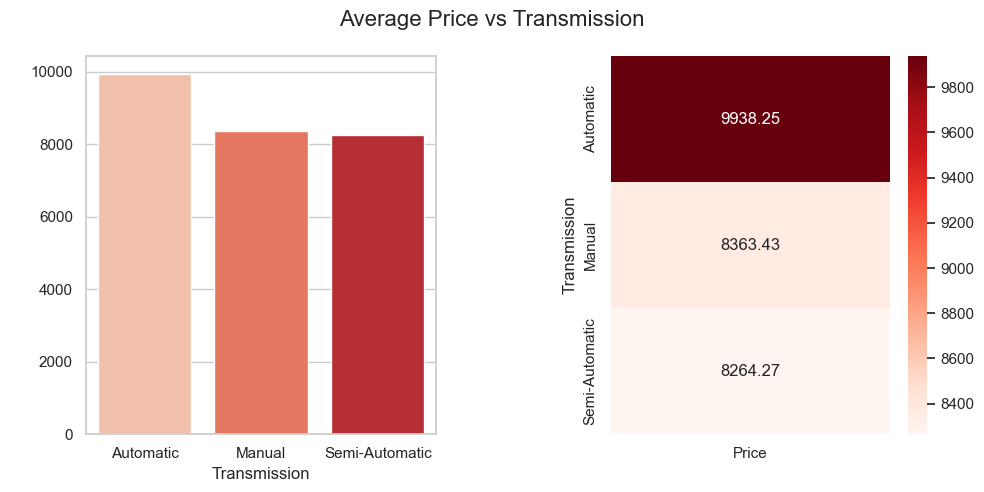

In [49]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

plt.suptitle("Average Price vs Transmission", fontsize=16)

sns.barplot(x=pivot.index, y=pivot.Price, ax=axes[0], palette="Reds")
axes[0].set_xlabel('Transmission')
axes[0].set_ylabel(' ')

sns.heatmap(pivot, annot=True, cmap = "Reds", cbar = True, fmt=".2f",ax=axes[1])
axes[1].set_xlabel(' ')
axes[1].set_ylabel('Transmission')

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()


* Automatic vehicles generally command higher prices, while manual and semi-automatic cars are typically more budget-friendly. This suggests that automatic transmissions are likely more prevalent in higher-end or newer models, which could explain their elevated price.

In [50]:
df.Owner_Count.value_counts()

Owner_Count
5    2036
1    2036
2    2020
3    1977
4    1931
Name: count, dtype: int64

In [54]:
sns.set_theme(style="whitegrid")
fig = px.scatter(df, x="Owner_Count", y="Price", trendline="ols", title="Owner Count vs Price")

fig.update_traces(marker=dict(color='red'),  
                  line=dict(color='red')) 

fig.show()

In [55]:
brand_model_price = df.groupby(["Brand", "Model"])[["Price"]].agg(["mean", "min", "max", "count"]).reset_index()

brand_model_price.columns = ["Brand", "Model", "Avg_Price", "Min_Price", "Max_Price", "Count"]

print(brand_model_price)

         Brand     Model    Avg_Price  Min_Price  Max_Price  Count
0         Audi        A3  8912.316568       2000      18255    338
1         Audi        A4  8919.962857       2374      16619    350
2         Audi        Q5  8955.257143       2000      16734    350
3          BMW  3 Series  8854.752239       2000      17134    335
4          BMW  5 Series  8669.218130       2000      17386    353
5          BMW        X5  8581.311897       2000      16544    311
6    Chevrolet   Equinox  9156.320635       2000      17054    315
7    Chevrolet    Impala  9001.115493       2000      17072    355
8    Chevrolet    Malibu  8898.180180       2000      17661    333
9         Ford  Explorer  8804.895210       2000      18017    334
10        Ford    Fiesta  8971.077135       2000      16705    363
11        Ford     Focus  8775.378917       2000      16969    351
12       Honda    Accord  8743.761644       2000      17906    365
13       Honda      CR-V  8734.714286       2000      17899   

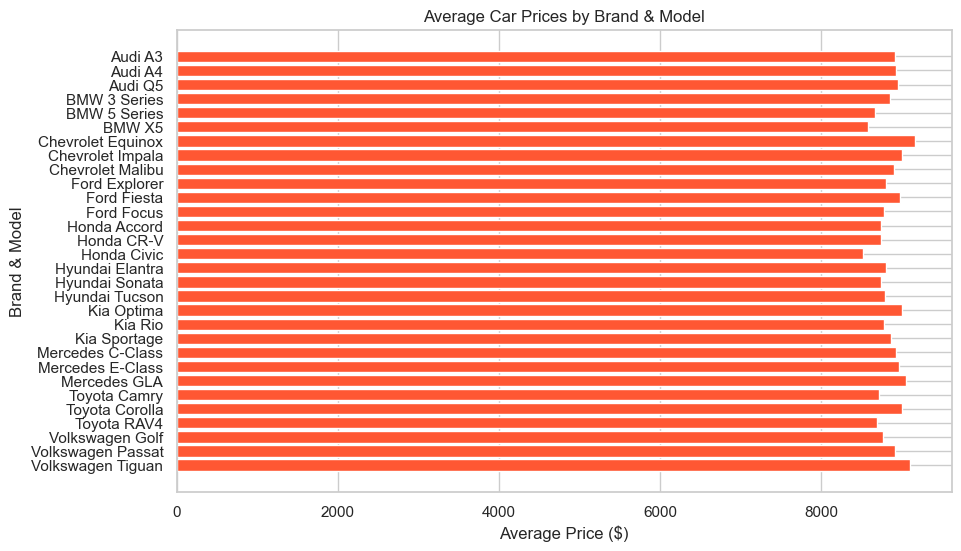

In [57]:
data = df.groupby(["Brand", "Model"])["Price"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.barh(data.apply(lambda x: f"{x['Brand']} {x['Model']}", axis=1), data["Price"], color="#FF5733")

plt.xlabel("Average Price ($)")
plt.ylabel("Brand & Model")
plt.title("Average Car Prices by Brand & Model")
plt.gca().invert_yaxis() 
plt.show()